In [1]:
from pymongo import MongoClient
import pymongo
import pandas as pd
import re
from collections import Counter
import math
import numpy as np
from sshtunnel import SSHTunnelForwarder
import warnings
# 忽略所有警告
warnings.filterwarnings("ignore")

In [2]:
from xgboost import XGBClassifier
model = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor')
print("GPU 設定成功")


GPU 設定成功


In [4]:
#讀取
df = pd.read_excel("data_clearned.xlsx")
df

,Unnamed: 0,縣市,簽約租金,鄉鎮市區,出租人年齡,建物型態,屋齡,幾房,實際使用坪數,是否為弱勢身分,承租人年齡,高齡者,KMeans_生活型態分群,是否電梯大樓
0,0,高雄市,20349,前鎮區,46,透天厝,31,4,56.044175,0,50,0,2,0
1,1,高雄市,20009,前鎮區,49,透天厝,32,4,56.044175,0,52,0,2,0
2,2,高雄市,19808,前鎮區,52,透天厝,36,4,56.044175,0,56,0,2,0
3,3,高雄市,7990,苓雅區,59,公寓,36,4,26.399175,1,65,1,2,0
4,4,高雄市,9931,鳳山區,35,公寓,36,2,29.971700,0,48,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8593,8593,高雄市,17960,三民區,47,住宅大樓（十一層(含)以上有電梯）,29,2,35.177725,0,34,0,2,1
8594,8594,高雄市,13002,前鎮區,65,公寓,36,3,26.822675,1,50,0,2,0
8595,8595,高雄市,16001,楠梓區,49,住宅大樓（十一層(含)以上有電梯）,15,1,21.223400,1,41,0,1,1
8596,8596,高雄市,17997,鳳山區,51,公寓,38,2,22.279125,0,36,0,2,0


In [5]:
testdf_3 = df

In [6]:
print("總樣本數  高齡者  比例")
print(len(testdf_3), sum(testdf_3['高齡者']), round((sum(testdf_3['高齡者']) / len(testdf_3)) * 100, 1) if len(testdf_3) > 0 else 0)

總樣本數  高齡者  比例
8598 434 5.0


In [7]:
testdf_3.columns

Index(['Unnamed: 0', '縣市', '簽約租金', '鄉鎮市區', '出租人年齡', '建物型態', '屋齡', '幾房',
       '實際使用坪數', '是否為弱勢身分', '承租人年齡', '高齡者', 'KMeans_生活型態分群', '是否電梯大樓'],
      dtype='object')

[Search 01/24] AUC=0.6124 model={'hidden_dims': [256, 128], 'emb_dim': 4, 'dropout': 0.3} fit={'weight_decay': 1e-05, 'patience': 25, 'max_epochs': 150, 'lr': 0.001, 'batch_size': 512}
[Search 02/24] AUC=0.6213 model={'hidden_dims': [128, 64], 'emb_dim': 2, 'dropout': 0.2} fit={'weight_decay': 1e-05, 'patience': 25, 'max_epochs': 150, 'lr': 0.01, 'batch_size': 256}
[Search 03/24] AUC=0.6087 model={'hidden_dims': [128, 64, 32], 'emb_dim': 2, 'dropout': 0.3} fit={'weight_decay': 0.0, 'patience': 25, 'max_epochs': 150, 'lr': 0.001, 'batch_size': 256}
[Search 04/24] AUC=0.6137 model={'hidden_dims': [128, 64, 32], 'emb_dim': 3, 'dropout': 0.3} fit={'weight_decay': 0.0, 'patience': 25, 'max_epochs': 150, 'lr': 0.003, 'batch_size': 1024}
[Search 05/24] AUC=0.6153 model={'hidden_dims': [64, 32], 'emb_dim': 3, 'dropout': 0.2} fit={'weight_decay': 0.0001, 'patience': 25, 'max_epochs': 150, 'lr': 0.003, 'batch_size': 256}
[Search 06/24] AUC=0.6194 model={'hidden_dims': [256, 128], 'emb_dim': 3, '

  0%|          | 0/860 [00:00<?, ?it/s]

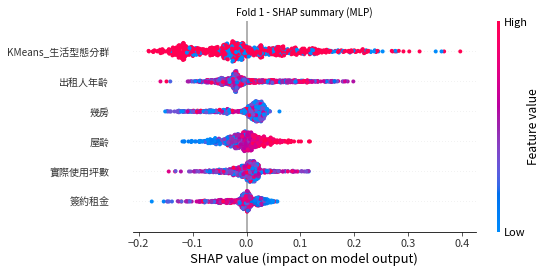


===== 第 2 折交叉驗證 =====
最佳閥值: 0.4904
準確率: 0.6558, 精確度: 0.0825, 召回率: 0.5814, F1-score: 0.1445, AUC: 0.6243


  0%|          | 0/860 [00:00<?, ?it/s]

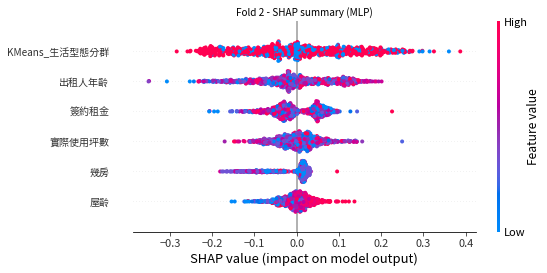


===== 第 3 折交叉驗證 =====
最佳閥值: 0.4692
準確率: 0.5674, 精確度: 0.0814, 召回率: 0.7442, F1-score: 0.1468, AUC: 0.6566


  0%|          | 0/860 [00:00<?, ?it/s]

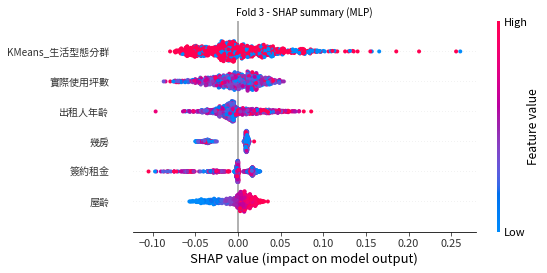


===== 第 4 折交叉驗證 =====
最佳閥值: 0.4777
準確率: 0.4442, 精確度: 0.0693, 召回率: 0.8140, F1-score: 0.1277, AUC: 0.6135


  0%|          | 0/860 [00:00<?, ?it/s]

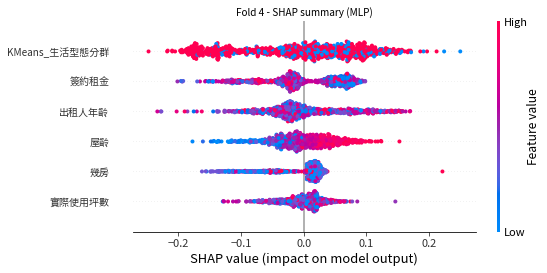


===== 第 5 折交叉驗證 =====
最佳閥值: 0.5254
準確率: 0.6698, 精確度: 0.0833, 召回率: 0.5455, F1-score: 0.1446, AUC: 0.6333


  0%|          | 0/860 [00:00<?, ?it/s]

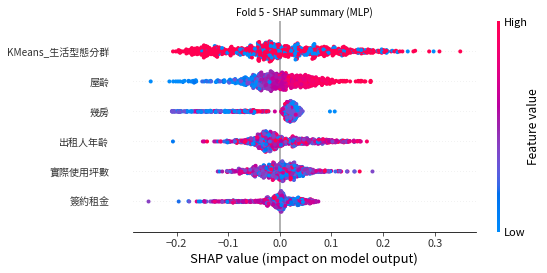


===== 第 6 折交叉驗證 =====
最佳閥值: 0.4683
準確率: 0.6163, 精確度: 0.0819, 召回率: 0.6364, F1-score: 0.1451, AUC: 0.6115


  0%|          | 0/860 [00:00<?, ?it/s]

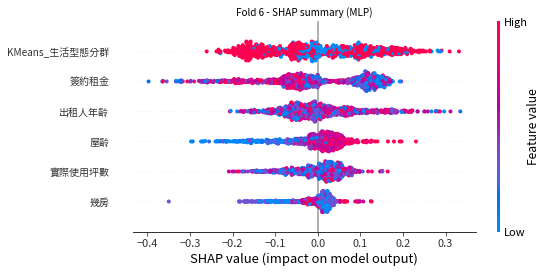


===== 第 7 折交叉驗證 =====
最佳閥值: 0.4691
準確率: 0.6105, 精確度: 0.0855, 召回率: 0.6818, F1-score: 0.1519, AUC: 0.6484


  0%|          | 0/860 [00:00<?, ?it/s]

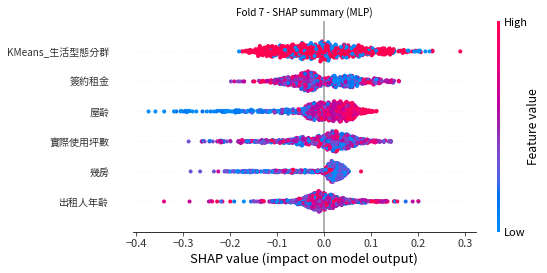


===== 第 8 折交叉驗證 =====
最佳閥值: 0.5432
準確率: 0.7477, 精確度: 0.1050, 召回率: 0.5227, F1-score: 0.1749, AUC: 0.6498


  0%|          | 0/860 [00:00<?, ?it/s]

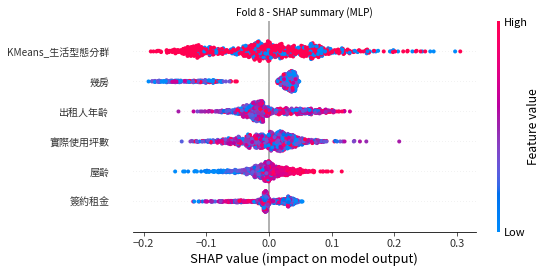


===== 第 9 折交叉驗證 =====
最佳閥值: 0.3934
準確率: 0.4796, 精確度: 0.0720, 召回率: 0.7907, F1-score: 0.1320, AUC: 0.6181


  0%|          | 0/859 [00:00<?, ?it/s]

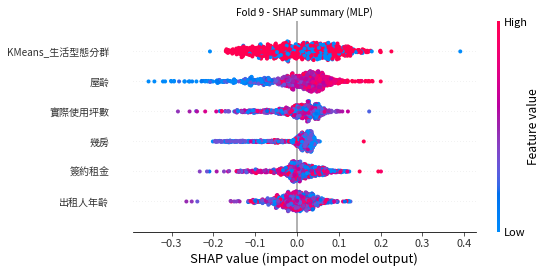


===== 第 10 折交叉驗證 =====
最佳閥值: 0.5086
準確率: 0.5087, 精確度: 0.0722, 召回率: 0.7442, F1-score: 0.1317, AUC: 0.6265


  0%|          | 0/859 [00:00<?, ?it/s]

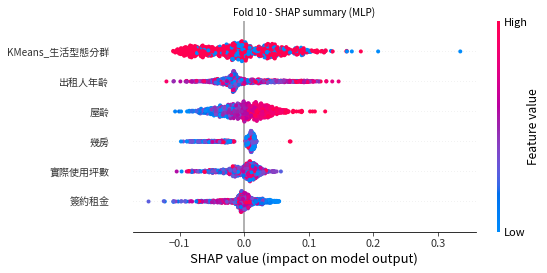


===== MLP（class-weight） 總平均指標與 95% CI =====
accuracy   平均: 0.5991 | 95% CI: [0.5383, 0.6598]
precision  平均: 0.0834 | 95% CI: [0.0761, 0.0906]
recall     平均: 0.6712 | 95% CI: [0.6082, 0.7342]
f1         平均: 0.1473 | 95% CI: [0.1373, 0.1574]
roc_auc    平均: 0.6361 | 95% CI: [0.6226, 0.6495]

===== 平均特徵重要性 (SHAP across folds, MLP) =====
         Feature  Mean SHAP Importance
1  KMeans_生活型態分群              0.073576
3          出租人年齡              0.043130
4           簽約租金              0.039408
0             屋齡              0.036804
5             幾房              0.034745
2         實際使用坪數              0.032698


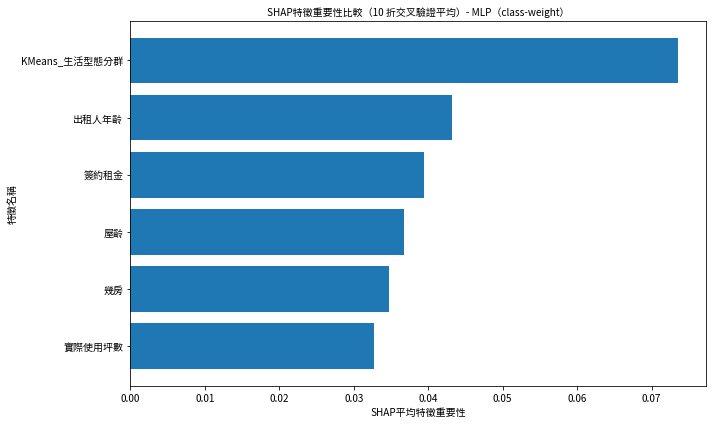

In [9]:
# =========================================
# MLP + Class-Weight（不做 SMOTE）+ SHAP 修正版（可直接執行）
# =========================================
# pip install torch shap scikit-learn matplotlib pandas numpy

import os, urllib.request, random, warnings, math, time
warnings.filterwarnings("ignore", category=UserWarning)

import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams

from sklearn.model_selection import StratifiedKFold, ParameterSampler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

# --------- 字型（思源黑體繁體，避免中文亂碼） ---------
font_url = 'https://github.com/adobe-fonts/source-han-sans/raw/release/OTF/TraditionalChinese/SourceHanSansTC-Regular.otf'
font_path = 'SourceHanSansTC-Regular.otf'
if not os.path.exists(font_path):
    print("正在下載字體...")
    urllib.request.urlretrieve(font_url, font_path)
    print("字體下載完成！")
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
rcParams['font.family'] = font_prop.get_name()

# -----------------------------
# 隨機種子與裝置
# -----------------------------
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
random.seed(RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# -----------------------------
# 特徵與目標（依你的欄位）
# -----------------------------
SAS_vars = ['屋齡', 'KMeans_生活型態分群', '實際使用坪數', '出租人年齡', '簽約租金', '幾房']
TARGET = '高齡者'

# 假設你已載入 testdf_3（DataFrame）
X_full = testdf_3[SAS_vars].copy()
y_full = testdf_3[TARGET].astype(int).copy()

# 類別/數值欄位定義
cat_var = 'KMeans_生活型態分群'
num_vars = [c for c in SAS_vars if c != cat_var]

# 類別整體整數編碼（固定映射，避免跨 fold 漂移）
X_full[cat_var] = X_full[cat_var].astype('category')
X_full[cat_var] = X_full[cat_var].cat.codes.astype(int)
n_categories = int(X_full[cat_var].nunique())

# -----------------------------
# MLP 模型（含類別 embedding）
# -----------------------------
class MLPWithEmbedding(nn.Module):
    def __init__(self, n_num_features, n_cat, emb_dim, hidden_dims=(64,32), dropout=0.2):
        super().__init__()
        self.emb = nn.Embedding(num_embeddings=n_cat, embedding_dim=emb_dim)
        in_dim = n_num_features + emb_dim
        layers = []
        last = in_dim
        for h in hidden_dims:
            layers += [nn.Linear(last, h), nn.ReLU(), nn.Dropout(dropout)]
            last = h
        self.mlp = nn.Sequential(*layers)
        self.out = nn.Linear(last, 1)  # 單一 logit（配 BCEWithLogitsLoss）
    
    def forward(self, x_num, x_cat_idx):
        # x_num: [B, n_num]; x_cat_idx: [B] (long)
        emb = self.emb(x_cat_idx)          # [B, emb_dim]
        x = torch.cat([x_num, emb], dim=1) # [B, n_num + emb_dim]
        z = self.mlp(x)
        logit = self.out(z).squeeze(1)     # [B]
        return logit

# -----------------------------
# 訓練與驗證流程
# -----------------------------
def make_pos_weight(y_train):
    pos = (y_train == 1).sum()
    neg = (y_train == 0).sum()
    pw = float(neg) / max(1.0, float(pos))
    return torch.tensor([pw], dtype=torch.float, device=device)

def train_one_model(X_tr_num, X_tr_cat_idx, y_tr, X_va_num, X_va_cat_idx, y_va, model_params, fit_params):
    # 資料轉 tensor / dataloader
    Xtr_num_t = torch.tensor(X_tr_num, dtype=torch.float32)
    Xtr_cat_t = torch.tensor(X_tr_cat_idx, dtype=torch.long)
    ytr_t     = torch.tensor(y_tr, dtype=torch.float32)
    Xva_num_t = torch.tensor(X_va_num, dtype=torch.float32)
    Xva_cat_t = torch.tensor(X_va_cat_idx, dtype=torch.long)
    yva_t     = torch.tensor(y_va, dtype=torch.float32)

    train_loader = DataLoader(TensorDataset(Xtr_num_t, Xtr_cat_t, ytr_t),
                              batch_size=fit_params['batch_size'], shuffle=True, drop_last=False)
    # 建模
    model = MLPWithEmbedding(
        n_num_features=X_tr_num.shape[1],
        n_cat=n_categories,
        emb_dim=model_params['emb_dim'],
        hidden_dims=tuple(model_params['hidden_dims']),
        dropout=model_params['dropout']
    ).to(device)

    optimizer = torch.optim.AdamW(model.parameters(), lr=fit_params['lr'], weight_decay=fit_params['weight_decay'])
    pos_weight = make_pos_weight(y_tr)
    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

    best_auc = -np.inf
    best_state = None
    patience = fit_params['patience']
    max_epochs = fit_params['max_epochs']
    no_improve = 0

    for epoch in range(1, max_epochs+1):
        model.train()
        for xb_num, xb_cat, yb in train_loader:
            xb_num = xb_num.to(device); xb_cat = xb_cat.to(device); yb = yb.to(device)
            optimizer.zero_grad()
            logit = model(xb_num, xb_cat)
            loss = criterion(logit, yb)
            loss.backward()
            optimizer.step()

        # 驗證 AUC（early stopping 監控）
        model.eval()
        with torch.no_grad():
            va_logits = model(Xva_num_t.to(device), Xva_cat_t.to(device))
            va_prob = torch.sigmoid(va_logits).cpu().numpy()
            auc = roc_auc_score(y_va, va_prob)
        if auc > best_auc + 1e-4:
            best_auc = auc
            best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}
            no_improve = 0
        else:
            no_improve += 1
        if no_improve >= patience:
            # print(f"Early stop @ epoch {epoch} best_auc={best_auc:.5f}")
            break

    # 載回最佳狀態
    if best_state is not None:
        model.load_state_dict({k: v.to(device) for k, v in best_state.items()})
    model.eval()
    return model, best_auc

# -----------------------------
# 工具：建矩陣、搜尋空間、快速 3-fold AUC
# -----------------------------
def build_mats(df_tr, df_va):
    scaler = StandardScaler()
    X_tr_num = scaler.fit_transform(df_tr[num_vars].values)
    X_va_num = scaler.transform(df_va[num_vars].values)
    X_tr_cat_idx = df_tr[cat_var].values.astype(int)
    X_va_cat_idx = df_va[cat_var].values.astype(int)
    return X_tr_num, X_tr_cat_idx, X_va_num, X_va_cat_idx

search_space_model = {
    'emb_dim': [2, 3, 4],
    'hidden_dims': [
        [64, 32],
        [128, 64],
        [128, 64, 32],
        [256, 128],
    ],
    'dropout': [0.1, 0.2, 0.3]
}
search_space_fit = {
    'lr': [1e-3, 3e-3, 1e-2],
    'weight_decay': [0.0, 1e-5, 1e-4],
    'batch_size': [256, 512, 1024],
    'max_epochs': [150],   # 比 TabNet 更輕，拉高一點
    'patience': [25]
}

def sample_param_pairs(n_iter=24, seed=RANDOM_STATE):
    rng = np.random.RandomState(seed)
    mlist = list(ParameterSampler(search_space_model, n_iter=n_iter, random_state=rng))
    flist = list(ParameterSampler(search_space_fit,   n_iter=n_iter, random_state=rng))
    return list(zip(mlist, flist))

def quick_auc(model_params, fit_params, X_df, y):
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)
    aucs = []
    for tr_idx, va_idx in cv.split(X_df, y):
        df_tr, df_va = X_df.iloc[tr_idx], X_df.iloc[va_idx]
        y_tr, y_va = y.iloc[tr_idx].values, y.iloc[va_idx].values
        X_tr_num, X_tr_cat, X_va_num, X_va_cat = build_mats(df_tr, df_va)
        model, auc = train_one_model(X_tr_num, X_tr_cat, y_tr, X_va_num, X_va_cat, y_va,
                                     model_params, fit_params)
        aucs.append(auc)
    return float(np.mean(aucs))

# -----------------------------
# 手動隨機搜尋（達標即停，否則用完 n_iter）
# -----------------------------
TARGET_AUC = 0.64  # 你可調整門檻
pairs = sample_param_pairs(n_iter=24)
best_model_params, best_fit_params, best_auc = None, None, -np.inf

for i, (mp, fp) in enumerate(pairs, 1):
    try:
        auc = quick_auc(mp, fp, X_full, y_full)
        print(f"[Search {i:02d}/{len(pairs)}] AUC={auc:.4f} model={mp} fit={fp}")
        if auc > best_auc:
            best_auc, best_model_params, best_fit_params = auc, mp, fp
        if best_auc >= TARGET_AUC:
            print(f"🎯 達標停止（AUC={best_auc:.4f}）"); break
    except Exception as e:
        print(f"[Search {i:02d}] 跳過：{e}")

if best_model_params is None:
    raise RuntimeError("搜尋皆失敗，請檢查安裝或縮小搜尋空間。")

print("\n===== 最佳超參數（MLP + class-weight）=====")
print("model_params:", best_model_params)
print("fit_params  :", best_fit_params)
print(f"CV AUC ≈ {best_auc:.4f}")

# -----------------------------
# 10 折交叉驗證 + SHAP（KernelExplainer）
# -----------------------------
metrics = {k: [] for k in ['accuracy','precision','recall','f1','roc_auc','best_threshold']}
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)
all_shap_values = []
BACKGROUND_K, SHAP_TEST_LIMIT, SHAP_NSAMPLES = 50, 1500, 200

def mean_ci(arr):
    arr = np.asarray(arr, dtype=float)
    m = np.mean(arr); sem = np.std(arr, ddof=1)/np.sqrt(len(arr)); mar = 1.96*sem
    return m, m-mar, m+mar

def ensure_shap_matrix(values, n_features_expected):
    if hasattr(values, "values"): arr = values.values
    elif isinstance(values, list):
        if len(values) != 1: raise ValueError(f"Expect single-output SHAP, got list len={len(values)}")
        arr = np.asarray(values[0])
    else: arr = np.asarray(values)
    if arr.ndim != 2: raise ValueError(f"SHAP matrix should be 2D, got {arr.shape}")
    if arr.shape[1] != n_features_expected: raise ValueError(f"SHAP cols {arr.shape[1]} != {n_features_expected}")
    return arr

for fold, (train_idx, test_idx) in enumerate(kfold.split(X_full, y_full), 1):
    print(f"\n===== 第 {fold} 折交叉驗證 =====")
    df_tr, df_te = X_full.iloc[train_idx].copy(), X_full.iloc[test_idx].copy()
    y_tr, y_te = y_full.iloc[train_idx].values, y_full.iloc[test_idx].values

    # 標準化（數值）+ 類別 index
    scaler = StandardScaler()
    X_tr_num = scaler.fit_transform(df_tr[num_vars].values)
    X_te_num = scaler.transform(df_te[num_vars].values)
    X_tr_cat = df_tr[cat_var].values.astype(int)
    X_te_cat = df_te[cat_var].values.astype(int)

    # 訓練本折最佳模型
    model, _ = train_one_model(X_tr_num, X_tr_cat, y_tr, X_te_num, X_te_cat, y_te,
                               best_model_params, best_fit_params)

    # 預測機率
    with torch.no_grad():
        te_logits = model(torch.tensor(X_te_num, dtype=torch.float32, device=device),
                          torch.tensor(X_te_cat, dtype=torch.long, device=device))
        te_prob = torch.sigmoid(te_logits).cpu().numpy()

    # Youden’s J
    fpr, tpr, thr = roc_curve(y_te, te_prob)
    thr_best = thr[np.argmax(tpr - fpr)]
    y_pred = (te_prob >= thr_best).astype(int)

    metrics['accuracy'].append(accuracy_score(y_te, y_pred))
    metrics['precision'].append(precision_score(y_te, y_pred))
    metrics['recall'].append(recall_score(y_te, y_pred))
    metrics['f1'].append(f1_score(y_te, y_pred))
    metrics['roc_auc'].append(roc_auc_score(y_te, te_prob))
    metrics['best_threshold'].append(thr_best)

    print(f"最佳閥值: {thr_best:.4f}")
    print(f"準確率: {metrics['accuracy'][-1]:.4f}, 精確度: {metrics['precision'][-1]:.4f}, "
          f"召回率: {metrics['recall'][-1]:.4f}, F1-score: {metrics['f1'][-1]:.4f}, "
          f"AUC: {metrics['roc_auc'][-1]:.4f}")

    # ---- SHAP：定義 f(X) 回傳正類機率（和訓練一樣的輸入佈局）----
    # 我們把輸入矩陣設為 [數值..., 類別index] 以便 kmeans 摘要
    X_tr_mat = np.hstack([X_tr_num, X_tr_cat.reshape(-1,1)])
    X_te_mat = np.hstack([X_te_num, X_te_cat.reshape(-1,1)])

    def f_pos(X_np):
        # 拆分數值與類別欄
        X_num = torch.tensor(X_np[:, :len(num_vars)], dtype=torch.float32, device=device)
        X_cat = torch.tensor(X_np[:, len(num_vars)].astype(int), dtype=torch.long, device=device)
        with torch.no_grad():
            logits = model(X_num, X_cat)
            return torch.sigmoid(logits).cpu().numpy()

    # 背景點
    try:
        background = shap.kmeans(X_tr_mat, BACKGROUND_K)
    except Exception:
        bg_n = min(200, len(X_tr_mat))
        idx = np.random.RandomState(RANDOM_STATE).choice(len(X_tr_mat), size=bg_n, replace=False)
        background = X_tr_mat[idx]

    # 減少 SHAP 計算負擔
    if len(X_te_mat) > SHAP_TEST_LIMIT:
        sid = np.random.RandomState(RANDOM_STATE).choice(len(X_te_mat), size=SHAP_TEST_LIMIT, replace=False)
        X_te_for_shap = X_te_mat[sid]
        X_te_for_shap_df = pd.DataFrame(df_te.iloc[sid][SAS_vars].values, columns=SAS_vars)
    else:
        X_te_for_shap = X_te_mat
        X_te_for_shap_df = df_te[SAS_vars].copy()

    explainer = shap.KernelExplainer(f_pos, background)
    raw_shap = explainer.shap_values(X_te_for_shap, nsamples=SHAP_NSAMPLES)

    shap_matrix = ensure_shap_matrix(raw_shap, n_features_expected=len(SAS_vars))
    shap_importance = np.abs(shap_matrix).mean(axis=0).ravel()
    all_shap_values.append(shap_importance)

    shap.summary_plot(shap_matrix, X_te_for_shap_df, feature_names=SAS_vars, show=False)
    ax = plt.gca()
    for label in ax.get_yticklabels():
        label.set_fontproperties(font_prop)
    plt.title(f"Fold {fold} - SHAP summary (MLP)", fontproperties=font_prop)
    plt.tight_layout()
    plt.show()

# -----------------------------
# 總平均與 95% CI
# -----------------------------
def mean_ci_print(name, arr):
    m, l, u = mean_ci(arr)
    print(f"{name:<10} 平均: {m:.4f} | 95% CI: [{l:.4f}, {u:.4f}]")

print("\n===== MLP（class-weight） 總平均指標與 95% CI =====")
for k in ['accuracy','precision','recall','f1','roc_auc']:
    mean_ci_print(k, metrics[k])

# -----------------------------
# 平均 SHAP 重要性（跨折）
# -----------------------------
all_shap_values = np.asarray(all_shap_values)
if all_shap_values.ndim != 2 or all_shap_values.shape[1] != len(SAS_vars):
    raise ValueError(f"Expect all_shap_values shape=(n_folds, {len(SAS_vars)}), got {all_shap_values.shape}")

avg_shap = all_shap_values.mean(axis=0)
mean_feature_importance = (
    pd.DataFrame({'Feature': SAS_vars, 'Mean SHAP Importance': avg_shap})
      .sort_values(by='Mean SHAP Importance', ascending=False)
)
print("\n===== 平均特徵重要性 (SHAP across folds, MLP) =====")
print(mean_feature_importance)

plt.figure(figsize=(10,6))
plt.barh(mean_feature_importance['Feature'], mean_feature_importance['Mean SHAP Importance'])
plt.xlabel("SHAP平均特徵重要性", fontproperties=font_prop)
plt.ylabel("特徵名稱", fontproperties=font_prop)
plt.title("SHAP特徵重要性比較（10 折交叉驗證平均）- MLP（class-weight）", fontproperties=font_prop)
ax = plt.gca()
for label in ax.get_yticklabels():
    label.set_fontproperties(font_prop)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("不含弱勢shap_mean_importance_bar.png", dpi=300, bbox_inches="tight")
plt.savefig("不含弱勢shap_mean_importance_bar.svg", bbox_inches="tight")
plt.show()

# 輸出 CSV
mean_feature_importance.to_csv("不含弱勢MLP_class_weight_mean_shap_importance.csv", index=False)
